In [138]:
import urllib
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [47]:
with urllib.request.urlopen("https://api.blockchain.info/stats") as url:
    data = json.loads(url.read().decode())

In [48]:
data

{'timestamp': 1569934257000.0,
 'market_price_usd': 8399.95,
 'hash_rate': 81823934129.38673,
 'total_fees_btc': 5049729398,
 'n_btc_mined': 161250000000,
 'n_tx': 321343,
 'n_blocks_mined': 129,
 'minutes_between_blocks': 10.2266,
 'totalbc': 1796738750000000,
 'n_blocks_total': 597391,
 'estimated_transaction_volume_usd': 1142054589.4903061,
 'blocks_size': 151787207,
 'miners_revenue_usd': 13969094.119567307,
 'nextretarget': 598751,
 'difficulty': 12759819404408,
 'estimated_btc_sent': 13595968898509,
 'miners_revenue_btc': 1662,
 'total_btc_sent': 119152709845704,
 'trade_volume_btc': 20235.66,
 'trade_volume_usd': 169978532.217}

In [51]:
pd.read_csv("cost-per-transaction-percent.csv")

,2018-10-01 00:00:00,1.915185517714393
0,2018-10-02 00:00:00,1.375536
1,2018-10-03 00:00:00,1.603178
2,2018-10-04 00:00:00,1.870348
3,2018-10-05 00:00:00,1.719008
4,2018-10-06 00:00:00,2.681032
5,2018-10-07 00:00:00,4.760788
6,2018-10-08 00:00:00,1.805886
7,2018-10-09 00:00:00,1.538184
8,2018-10-10 00:00:00,1.573168
9,2018-10-11 00:00:00,1.442196


In [60]:
import os
file = []

for _,_, files in os.walk("."):
    for filename in files:
        if filename.endswith("csv"):
            file.append(filename)

In [70]:
table = None

for filename in file:
    
    if table is None:
        table = pd.read_csv(filename,  names=["time",filename.replace(".csv", "")])
    else:
        temp = pd.read_csv(filename,  names=["time",filename.replace(".csv", "")])
        table = pd.merge(table, temp, on='time')

In [71]:
table

,time,cost-per-transaction-percent,difficulty,hash-rate,market-price,miners-revenue (1),n-transactions,output-volume,transaction-fees
0,2018-10-02 00:00:00,1.375536,7.152633e+12,4.871163e+07,6562.641667,1.140733e+07,244772.0,9.486356e+05,25.722691
1,2018-10-03 00:00:00,1.603178,7.152633e+12,5.155610e+07,6470.402500,1.186584e+07,242303.0,9.324054e+05,21.364485
2,2018-10-04 00:00:00,1.870348,7.364268e+12,5.558828e+07,6563.628333,1.242960e+07,243157.0,8.925868e+05,18.709164
3,2018-10-05 00:00:00,1.719008,7.454969e+12,4.817651e+07,6568.549167,1.081404e+07,244719.0,8.835962e+05,21.336723
4,2018-10-06 00:00:00,2.681032,7.454969e+12,4.632356e+07,6581.486667,1.039927e+07,214843.0,8.351477e+05,17.578764
5,2018-10-07 00:00:00,4.760788,7.454969e+12,5.262357e+07,6558.537500,1.172710e+07,219731.0,8.152784e+05,13.066717
6,2018-10-08 00:00:00,1.805886,7.454969e+12,5.002945e+07,6618.567692,1.128000e+07,248041.0,7.951900e+05,16.795998
7,2018-10-09 00:00:00,1.538184,7.454969e+12,4.817651e+07,6621.711667,1.087064e+07,235862.0,7.960971e+05,16.666319
8,2018-10-10 00:00:00,1.573168,7.454969e+12,5.336474e+07,6563.009167,1.191602e+07,244945.0,7.242549e+05,15.633937
9,2018-10-11 00:00:00,1.442196,7.454969e+12,5.892357e+07,6248.635833,1.253425e+07,262467.0,7.599637e+05,18.417206


In [120]:
columns = list(table.columns)
columns.remove('time')

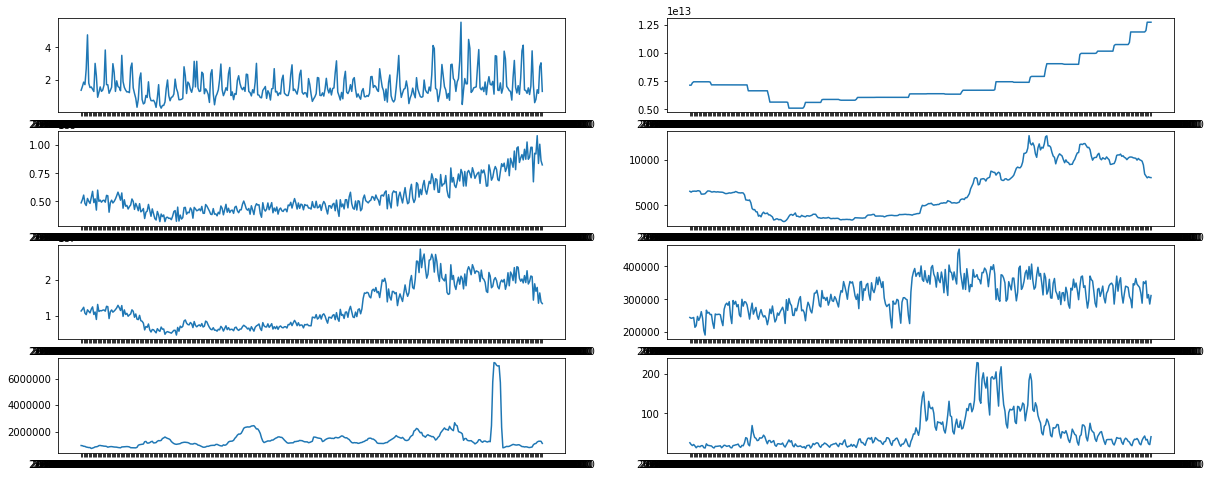

In [139]:
index = 1

fig = plt.figure(figsize=(20, 8))


for i in range(len(columns)):
    fig.add_subplot(4,2,i+1)
    plt.plot(table['time'], table[columns[i]])
 
plt.show()

In [140]:
table

,time,cost-per-transaction-percent,difficulty,hash-rate,market-price,miners-revenue (1),n-transactions,output-volume,transaction-fees
0,2018-10-02 00:00:00,1.375536,7.152633e+12,4.871163e+07,6562.641667,1.140733e+07,244772.0,9.486356e+05,25.722691
1,2018-10-03 00:00:00,1.603178,7.152633e+12,5.155610e+07,6470.402500,1.186584e+07,242303.0,9.324054e+05,21.364485
2,2018-10-04 00:00:00,1.870348,7.364268e+12,5.558828e+07,6563.628333,1.242960e+07,243157.0,8.925868e+05,18.709164
3,2018-10-05 00:00:00,1.719008,7.454969e+12,4.817651e+07,6568.549167,1.081404e+07,244719.0,8.835962e+05,21.336723
4,2018-10-06 00:00:00,2.681032,7.454969e+12,4.632356e+07,6581.486667,1.039927e+07,214843.0,8.351477e+05,17.578764
5,2018-10-07 00:00:00,4.760788,7.454969e+12,5.262357e+07,6558.537500,1.172710e+07,219731.0,8.152784e+05,13.066717
6,2018-10-08 00:00:00,1.805886,7.454969e+12,5.002945e+07,6618.567692,1.128000e+07,248041.0,7.951900e+05,16.795998
7,2018-10-09 00:00:00,1.538184,7.454969e+12,4.817651e+07,6621.711667,1.087064e+07,235862.0,7.960971e+05,16.666319
8,2018-10-10 00:00:00,1.573168,7.454969e+12,5.336474e+07,6563.009167,1.191602e+07,244945.0,7.242549e+05,15.633937
9,2018-10-11 00:00:00,1.442196,7.454969e+12,5.892357e+07,6248.635833,1.253425e+07,262467.0,7.599637e+05,18.417206
